In [282]:
import pandas as pd
import numpy as np
#importing the datasets
sales = pd.read_csv('data/parking_sales_status.csv')
construction = pd.read_csv('data/parking_construction_status.csv')

In [283]:
df = pd.merge(sales, construction , how="inner", on="rera_id")

df.shape

(71100, 10)

In [284]:

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

duplicates = df.duplicated()
print("Number of duplicates: ", duplicates.sum())

null_values = df.isnull()
print("Number of null values: ", null_values.sum().sum())

missing_values = df.isnull()
print("Number of missing values: ", missing_values.sum().sum())

Number of rows: 71100
Number of columns: 10
Number of duplicates:  0
Number of null values:  143374
Number of missing values:  143374


In [285]:
df.head()

,Unnamed: 0_x,rera_id,building_id_x,parking_type_x,count_booked,Unnamed: 0_y,building_id_y,parking_type_y,count_proposed,percent_completion
0,0,P51600022802,NaN,Covered Parking ( In Numbers),0,0,NaN,Covered Parking ( In Numbers),8,0.0
1,0,P51600022802,NaN,Covered Parking ( In Numbers),0,10906,NaN,Number of Garages ( In Numbers),0,0.0
2,10906,P51600022802,NaN,Number of Garages ( In Numbers),0,0,NaN,Covered Parking ( In Numbers),8,0.0
3,10906,P51600022802,NaN,Number of Garages ( In Numbers),0,10906,NaN,Number of Garages ( In Numbers),0,0.0
4,1,P51700010990,NaN,Covered Parking ( In Numbers),0,1,NaN,Covered Parking ( In Numbers),0,0.0


In [287]:
print(df['building_id_x'].isna().sum())
print(df['building_id_y'].isna().sum())

71100
71100


100%missing values in building_id

In [288]:
df = df.drop(['Unnamed: 0_x', 'building_id_x', 'Unnamed: 0_y', 'building_id_y'], axis=1)

In [289]:
df.head()

,rera_id,parking_type_x,count_booked,parking_type_y,count_proposed,percent_completion
0,P51600022802,Covered Parking ( In Numbers),0,Covered Parking ( In Numbers),8,0.0
1,P51600022802,Covered Parking ( In Numbers),0,Number of Garages ( In Numbers),0,0.0
2,P51600022802,Number of Garages ( In Numbers),0,Covered Parking ( In Numbers),8,0.0
3,P51600022802,Number of Garages ( In Numbers),0,Number of Garages ( In Numbers),0,0.0
4,P51700010990,Covered Parking ( In Numbers),0,Covered Parking ( In Numbers),0,0.0


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71100 entries, 0 to 71099
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rera_id             71100 non-null  object 
 1   parking_type_x      71100 non-null  object 
 2   count_booked        70528 non-null  object 
 3   parking_type_y      71100 non-null  object 
 4   count_proposed      70500 non-null  object 
 5   percent_completion  71098 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.8+ MB


1 float and 5 object variables

In [291]:
df['count_booked'] = pd.to_numeric(df['count_booked'], errors='coerce')
df['count_proposed'] = pd.to_numeric(df['count_proposed'], errors='coerce')


In [292]:

df['type1'] = [1 if x =='Covered Parking ( In Numbers)' else 0 for x in df['parking_type_x']]

df['type2'] = [1 if x =='Covered Parking ( In Numbers)' else 0 for x in df['parking_type_y']]

In [293]:
df.tail()

,rera_id,parking_type_x,count_booked,parking_type_y,count_proposed,percent_completion,type1,type2
71095,P52000004480,Covered Parking ( In Numbers),0.0,Covered Parking ( In Numbers),8.0,0.0,1,1
71096,P52000004481,Number of Garages ( In Numbers),0.0,Number of Garages ( In Numbers),0.0,0.0,0,0
71097,P52000004481,Number of Garages ( In Numbers),0.0,Covered Parking ( In Numbers),12.0,70.0,0,1
71098,P52000004481,Covered Parking ( In Numbers),5.0,Number of Garages ( In Numbers),0.0,0.0,1,0
71099,P52000004481,Covered Parking ( In Numbers),5.0,Covered Parking ( In Numbers),12.0,70.0,1,1


In [294]:
def f(row):
    if row['type1']==1 and row['type2']== 1:
        val = 1
    elif row['type1']== 0 and row['type2']== 0:
        val = 0
    else:
        val = 2
    
    return val

In [295]:
df['type'] = df.apply(f, axis=1)

In [296]:
df.head()

,rera_id,parking_type_x,count_booked,parking_type_y,count_proposed,percent_completion,type1,type2,type
0,P51600022802,Covered Parking ( In Numbers),0.0,Covered Parking ( In Numbers),8.0,0.0,1,1,1
1,P51600022802,Covered Parking ( In Numbers),0.0,Number of Garages ( In Numbers),0.0,0.0,1,0,2
2,P51600022802,Number of Garages ( In Numbers),0.0,Covered Parking ( In Numbers),8.0,0.0,0,1,2
3,P51600022802,Number of Garages ( In Numbers),0.0,Number of Garages ( In Numbers),0.0,0.0,0,0,0
4,P51700010990,Covered Parking ( In Numbers),0.0,Covered Parking ( In Numbers),0.0,0.0,1,1,1


In [297]:
print(df.dtypes)

rera_id                object
parking_type_x         object
count_booked          float64
parking_type_y         object
count_proposed        float64
percent_completion    float64
type1                   int64
type2                   int64
type                    int64
dtype: object


In [298]:
df = df.drop(['type1', 'type2', 'parking_type_x', 'parking_type_y'], axis=1)

In [299]:
df.tail()

,rera_id,count_booked,count_proposed,percent_completion,type
71095,P52000004480,0.0,8.0,0.0,1
71096,P52000004481,0.0,0.0,0.0,0
71097,P52000004481,0.0,12.0,70.0,2
71098,P52000004481,5.0,0.0,0.0,2
71099,P52000004481,5.0,12.0,70.0,1


In [300]:
print(df.describe())

       count_booked  count_proposed  percent_completion          type
count  70314.000000    70110.000000        71098.000000  71100.000000
mean       6.182183       27.934537           10.857324      1.250000
std       43.330274      109.247660           28.879914      0.829162
min        0.000000        0.000000            0.000000      0.000000
25%        0.000000        0.000000            0.000000      0.750000
50%        0.000000        0.000000            0.000000      1.500000
75%        0.000000       16.000000            0.000000      2.000000
max     2792.000000     6216.000000          100.000000      2.000000


In [313]:
max_value = df['count_booked'].max()
print(max_value)

2792.0


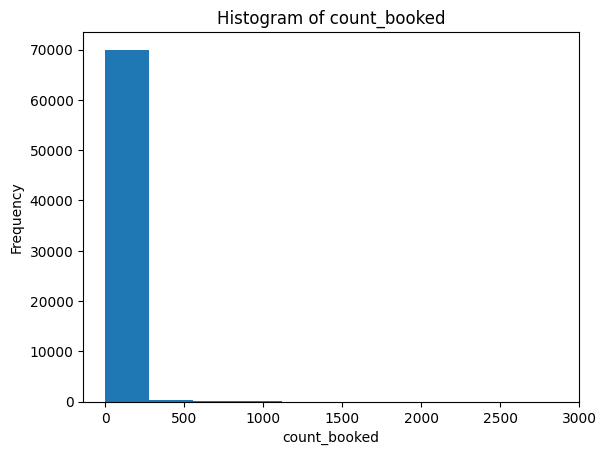

In [320]:
import numpy as np
import matplotlib.pyplot as plt

# Get the maximum value in the 'count_booked' column
max_value = df['count_booked'].max()

# Create a histogram of the 'count_booked' column with x-axis range from 0 to max_value
plt.hist(df['count_booked'], range=(0, max_value))
plt.title('Histogram of count_booked')
plt.xlabel('count_booked')
plt.ylabel('Frequency')

# Set the interval of 50 on the x-axis
plt.xticks(np.arange(0, max_value+500, 500))

plt.show()


the number of parking booked are between 0 and 250

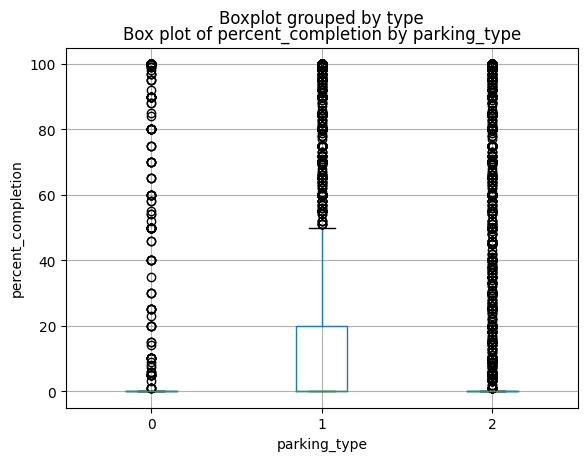

In [325]:
# Create a box plot of 'percent_completion' for each 'parking_type'
df.boxplot(column='percent_completion', by='type')
plt.title('Box plot of percent_completion by parking_type')
plt.xlabel('parking_type')
plt.ylabel('percent_completion')
plt.show()


1. outliers are present for all 3 types of parking and the data is scattered
2. parking type 1( covered parking) has more number of completions(50%completion)

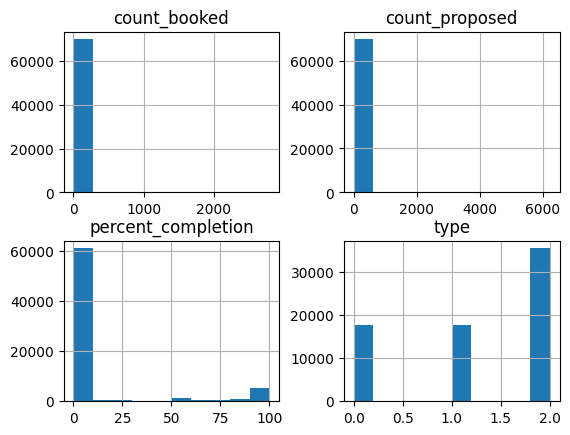

In [326]:
df.hist()
plt.show()


1. most of the parking are not booked
2. in many buildings parkings are not proposed or very less parkings are proposed
3. construction for most parking hasnt begun, only few parkings have completed the construction
4. type 2 parkings i.e. buildings with covered parking as well as garages are more in number

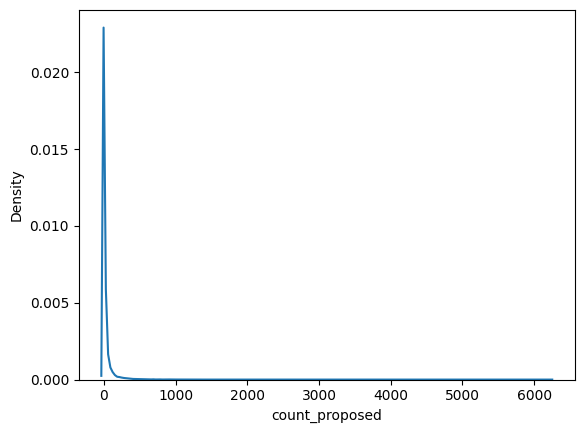

In [329]:
sns.kdeplot(df['count_proposed'])
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19412\849365563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


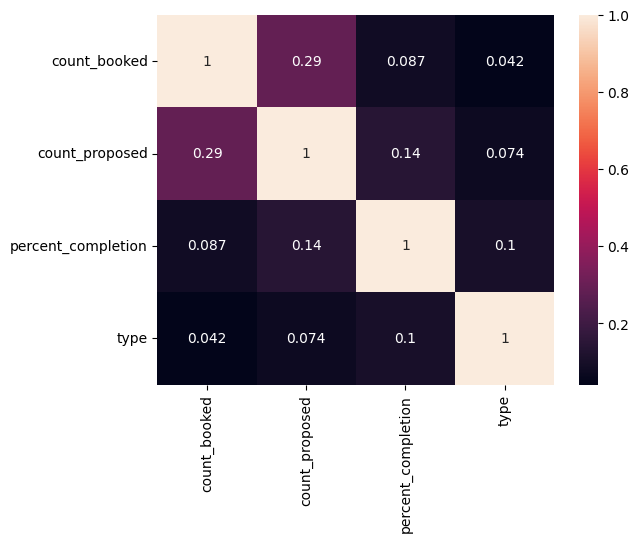

In [334]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


1. count proposed is directly proportional to count booked
2. proposed parking are directly related completion percent


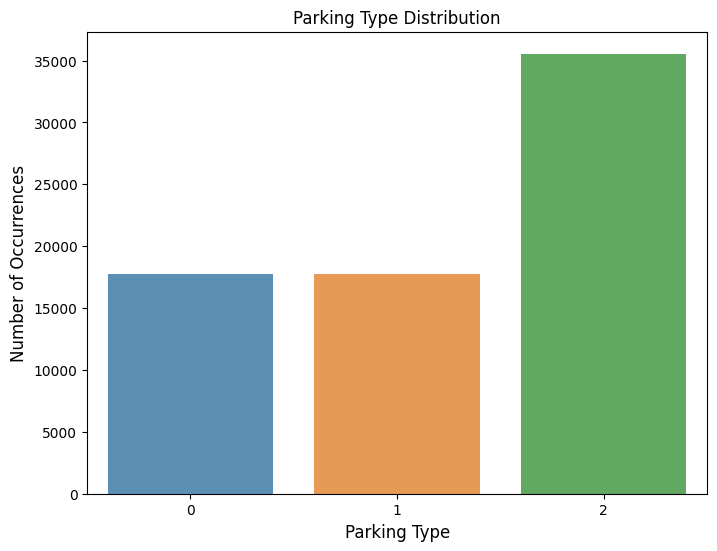

In [335]:
# Convert 'rera_id' to string
df['rera_id'] = df['rera_id'].astype(str)

# Get the unique values and counts for 'parking_type'
parking_type_counts = df['type'].value_counts()

# Bar plot of parking_type
plt.figure(figsize=(8,6))
sns.barplot(x=parking_type_counts.index, y=parking_type_counts.values, alpha=0.8)
plt.title('Parking Type Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Parking Type', fontsize=12)
plt.show()

1. 35000 buildings with both covered parkings and garages
2. around 17500 buildings with covered parkings and 17500 buildings with garages

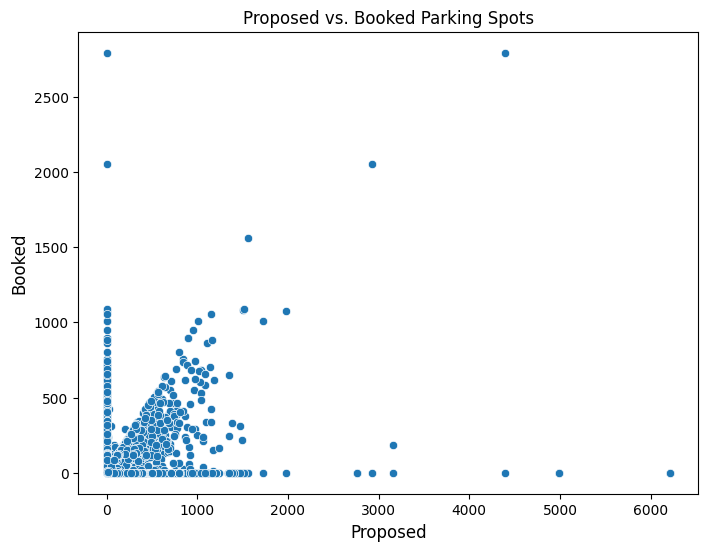

In [336]:
# Scatter plot of count_proposed vs. count_booked
plt.figure(figsize=(8,6))
sns.scatterplot(x='count_proposed', y='count_booked', data=df)
plt.title('Proposed vs. Booked Parking Spots')
plt.ylabel('Booked', fontsize=12)
plt.xlabel('Proposed', fontsize=12)
plt.show()

There appears to be a positive relationship between the 'count_booked' and 'count_proposed' variables. This suggests that as the number of bookings increases, the number of proposals tends to increase.

The relationship between the two variables appears to be moderately strong. The points on the scatter plot are not too scattered, but not too tightly clustered either.

There are a few outliers. These outliers should be analyzed separately to understand their impact on the relationship between the two variables.

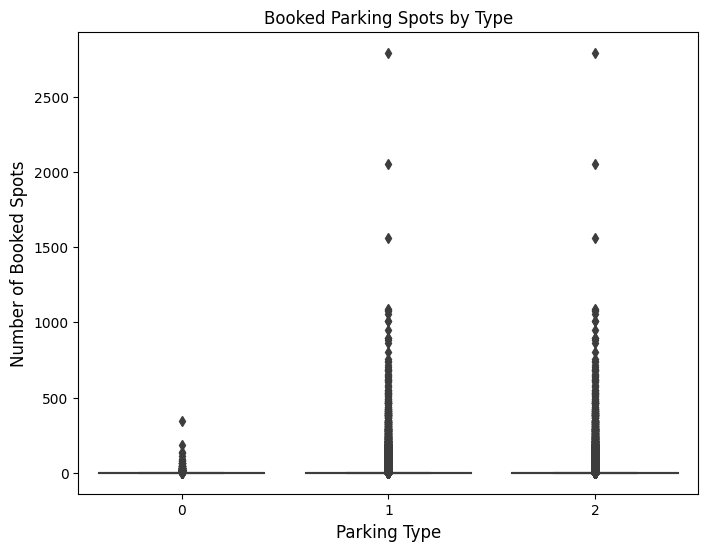

In [338]:
# Box plot of count_booked by parking_type
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='count_booked', data=df)
plt.title('Booked Parking Spots by Type')
plt.ylabel('Number of Booked Spots', fontsize=12)
plt.xlabel('Parking Type', fontsize=12)
plt.show()